# Embedding Antibody Sequences using Sapiens

Try out this notebook in your browser: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Merck/Sapiens/main?labpath=notebooks%2F02_sapiens_antibody_embedding.ipynb)

In [1]:
import sapiens

## Get antibody embeddings

Get a vector representation of each position in a sequence

In [2]:
residue_embed = sapiens.predict_residue_embedding(
    "QVKLQESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLDWIGAIYPGDGNTRYTHKFKGKATLTADKSSSTAYMQLSSLASEDSGVYYCARGEGNYAWFAYWGQGTTVTVSS", 
    "H", 
    layer=None
)
residue_embed.shape
# (layer, position in sequence, features)

(5, 119, 128)

Get a single vector for each sequence

In [3]:
seq_embed = sapiens.predict_sequence_embedding(
    "QVKLQESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLDWIGAIYPGDGNTRYTHKFKGKATLTADKSSSTAYMQLSSLASEDSGVYYCARGEGNYAWFAYWGQGTTVTVSS", 
    "H", 
    layer=None
)
seq_embed.shape
# (layer, features)

(5, 128)

In [4]:
# Sequence embedding from the last layer of our model
seq_embed[-1]

array([-9.07480419e-02,  9.95291919e-02,  4.42705452e-01,  1.76951781e-01,
        1.17761582e-01, -1.94507383e-03,  2.34257858e-02, -3.50218028e-01,
       -1.85383752e-01,  7.15080500e-02, -1.35001689e-01, -1.80759072e-01,
       -3.13696172e-03,  2.38733608e-02, -3.96349020e-02, -7.37678558e-02,
       -2.38686651e-01,  1.95218176e-01,  9.86455083e-02,  1.79552957e-01,
        3.17243673e-02, -3.33917588e-01, -8.63289535e-02, -5.02105728e-02,
       -7.52737671e-02,  1.59546663e-03, -4.97664124e-01, -1.65068462e-01,
       -4.22391072e-02,  2.61183560e-01, -2.77938306e-01, -1.29462019e-01,
       -1.64009444e-02,  4.70855199e-02,  5.25906906e-02,  8.33637081e-03,
       -4.97908682e-01,  7.72487223e-02,  7.08041430e-01, -3.29064250e-01,
        2.71839648e-01,  8.34674686e-02,  1.49200678e-01, -3.49692069e-02,
       -5.01605511e-01,  2.26801150e-02,  4.20483425e-02, -1.35063589e-01,
        5.07054757e-03, -2.95582205e-01,  1.43243223e-01, -1.41043082e-01,
       -3.53062339e-02, -

## Embedding sequences from CovAbDab

In [5]:
import sys
import pandas as pd
import numpy as np

In [6]:
!wget -O CovAbDab.csv http://opig.stats.ox.ac.uk/webapps/covabdab/static/downloads/CoV-AbDab_310122.csv

--2022-02-02 09:51:12--  http://opig.stats.ox.ac.uk/webapps/covabdab/static/downloads/CoV-AbDab_310122.csv
Resolving opig.stats.ox.ac.uk (opig.stats.ox.ac.uk)... 163.1.32.58
Connecting to opig.stats.ox.ac.uk (opig.stats.ox.ac.uk)|163.1.32.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3188765 (3,0M) [text/csv]
Saving to: ‘CovAbDab.csv’

CovAbDab.csv        100%[===================>]   3,04M  9,97MB/s    in 0,3s    

2022-02-02 09:51:12 (9,97 MB/s) - ‘CovAbDab.csv’ saved [3188765/3188765]



In [7]:
def get_species(row):
    for column in ['Heavy V Gene', 'Heavy J Gene', 'Light V Gene', 'Light J Gene']:
        if type(row[column]) == str and "(" in row[column]:
            species = row[column][row[column].find("(")+1:row[column].find(")")]
            return species
        return np.nan

In [8]:
cov = pd.read_csv("CovAbDab.csv")
cov["Species"] = cov.apply(get_species, axis=1)
cov["VH or VHH"] = cov["VH or VHH"].str.replace(' ', '') # remove whitespace
cov = cov[cov["VH or VHH"].str.len() < 140] # remove long sequences
print(f'{len(cov):,} sequences')
cov.head()

5,031 sequences


,Name,Ab or Nb,Binds to,Doesn't Bind to,Neutralising Vs,Not Neutralising Vs,Protein + Epitope,Origin,VH or VHH,VL,...,CDRH3,CDRL3,Structures,ABB Homology Model (if no structure),Sources,Date Added,Last Updated,Update Description,Notes/Following Up?,Species
0,AB-3467,Ab,SARS-CoV2_WT;SARS-CoV2_Alpha;SARS-CoV2_Beta;SA...,NaN,SARS-CoV2_WT;SARS-CoV2_Alpha;SARS-CoV2_Beta;SA...,NaN,S; RBD,Transgenic Mouse,QVQLQESGPGLVKPSETLSLTCTVSGGSISSYHWNWIRQPPGKGLE...,DIQLTQSPSFLSASVGDRVTITCRASQGISSYLAWYQQKPGKAPNL...,...,VREMRRGYSGYDYWDLYAFDI,QQLNSYPHT,https://www.rcsb.org/structure/7MSQ,NaN,"Deborah Burnett et al., 2021 (https://www.cell...","Jan 31, 2022","Jan 31, 2022",NaN,Complete,Human
1,Beta-55,Ab,SARS-CoV2_WT;SARS-CoV2_Alpha;SARS-CoV2_Beta;SA...,NaN,SARS-CoV2_WT;SARS-CoV2_Alpha;SARS-CoV2_Beta;SA...,NaN,S; RBD,B-cells (SARS-CoV2_Beta Human Patient),QVQLQESGPGLVKPSETLSLTCTVSGDSISSSRYYWGWIRQPPGKG...,AIRMTQSPSTLSASVGDRVTIACRASQSISAWLAWYQQKPGKAPKL...,...,ARPRPPDYYDNSGALLFDI,QQYISSSPWT,https://www.rcsb.org/structure/7QNW;https://ww...,NaN,"Wanwisa Dejnirattisai et al., 2022 (https://ww...","Jan 31, 2022","Jan 31, 2022",NaN,Complete,Human
2,COVOX-58,Ab,SARS-CoV2_WT;SARS-CoV2_Alpha;SARS-CoV2_Beta;SA...,NaN,SARS-CoV2_WT;SARS-CoV2_Alpha;SARS-CoV2_Beta;SA...,NaN,S; RBD,B-cells (SARS-CoV2_WT Human Patient),QVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQPPGKGLE...,SYELTQPPSVSVAPGQTARITCGGNTIGSKSVHWYQQRPGQAPVLV...,...,AREVGGTFGVLISREGGLDY,QVWDSSSDRVV,https://www.rcsb.org/structure/7QNY,NaN,"Wanwisa Dejnirattisai et al., 2022 (https://ww...","Jan 31, 2022","Jan 31, 2022",NaN,Complete,Human
3,S3H3,Ab,SARS-CoV2_Omicron,NaN,NaN,NaN,S; SD1,TBC,QVQLQQPGAELVRPGASVKLSCKASGYSFTRFWMNWVKQRPGQGLE...,DIVLTQSPASLAVSLGQRATISCRASKSVSASVYSYMHWYQQKPGQ...,...,ARKDYDYDAWFAY,HHSRELPPA,https://www.rcsb.org/structure/7WK8;https://ww...,NaN,PDB (To Be Published),"Jan 31, 2022","Jan 31, 2022",NaN,Awaiting publication for antibody origin and v...,Mouse
4,WS6,Ab,SARS-CoV2_WT,NaN,SARS-CoV2_WT,NaN,S; S2,Immunised Mouse,EVQFQQSGTVLARPGASVKMSCKASGYTFTNYWIHWVKQRPGQGLE...,QIVLTQSPAIMSASPGEKVTISCSATSSVSYIYWYQQRPGSSPKPW...,...,TRTGSYFDY,QQYQSYPPT,Expected (7TCQ),NaN,"Wei Shi et al., 2022 (https://www.biorxiv.org/...","Jan 31, 2022","Jan 31, 2022",NaN,Complete,Mouse


In [9]:
cov['Species'].value_counts()

Human     4171
Alpaca     601
Mouse      197
Rhesus       4
Rabbit       1
Name: Species, dtype: int64

### Embed all sequences

In [10]:
%%time

embeds = cov["VH or VHH"].apply(lambda seq: pd.Series(sapiens.predict_sequence_embedding(seq, chain_type="H", layer=-1)))
embeds.head()

CPU times: user 44.6 s, sys: 4.27 s, total: 48.9 s
Wall time: 42.6 s


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.381833,-0.145210,0.400075,-0.192200,0.372433,-0.028457,-0.040415,-0.837510,0.048718,0.104679,...,-0.069942,-0.130423,0.464309,0.013803,-0.228947,-0.142629,-0.573161,-0.103746,-3.042827,0.178589
1,0.346709,0.051430,0.224349,-0.174947,0.387570,0.072381,-0.307820,-0.721257,0.076736,0.157805,...,-0.064019,0.093419,0.214775,0.141518,-0.153426,-0.127049,-0.913881,-0.156867,-3.041555,0.510796
2,0.213562,-0.058479,0.227581,-0.006196,0.328844,0.434604,-0.168914,-0.579082,-0.309450,-0.007991,...,-0.554031,-0.570596,0.270648,0.040909,-0.057007,-0.114113,-0.438200,0.029597,-3.055857,-0.065474
3,-0.060928,0.018172,0.378337,0.259958,0.141624,-0.164445,0.005993,-0.319594,-0.041254,0.066247,...,-0.188339,-0.210097,0.291788,0.146808,0.252775,-0.374744,-0.585028,-0.009195,-3.023292,-0.124702
4,-0.126387,0.139194,0.335886,0.192385,0.018125,-0.010146,0.077919,-0.349399,-0.099700,0.033491,...,-0.270734,-0.220299,0.245855,0.191424,0.317062,-0.352992,-0.558429,0.046949,-3.018512,-0.176609


### Visualize Embeddings

In [ ]:
!pip install seaborn scikit-learn

In [38]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
tsne = TSNE(n_components=2, init='pca', learning_rate='auto', perplexity=10)
X_embedded = tsne.fit_transform(embeds)

df = cov.copy()
df.insert(0, 't-SNE 1', X_embedded[:,0])
df.insert(1, 't-SNE 2', X_embedded[:,1])
df.head()

,t-SNE 1,t-SNE 2,Name,Ab or Nb,Binds to,Doesn't Bind to,Neutralising Vs,Not Neutralising Vs,Protein + Epitope,Origin,...,CDRH3,CDRL3,Structures,ABB Homology Model (if no structure),Sources,Date Added,Last Updated,Update Description,Notes/Following Up?,Species
0,63.660294,49.698170,AB-3467,Ab,SARS-CoV2_WT;SARS-CoV2_Alpha;SARS-CoV2_Beta;SA...,NaN,SARS-CoV2_WT;SARS-CoV2_Alpha;SARS-CoV2_Beta;SA...,NaN,S; RBD,Transgenic Mouse,...,VREMRRGYSGYDYWDLYAFDI,QQLNSYPHT,https://www.rcsb.org/structure/7MSQ,NaN,"Deborah Burnett et al., 2021 (https://www.cell...","Jan 31, 2022","Jan 31, 2022",NaN,Complete,Human
1,53.140816,-35.410717,Beta-55,Ab,SARS-CoV2_WT;SARS-CoV2_Alpha;SARS-CoV2_Beta;SA...,NaN,SARS-CoV2_WT;SARS-CoV2_Alpha;SARS-CoV2_Beta;SA...,NaN,S; RBD,B-cells (SARS-CoV2_Beta Human Patient),...,ARPRPPDYYDNSGALLFDI,QQYISSSPWT,https://www.rcsb.org/structure/7QNW;https://ww...,NaN,"Wanwisa Dejnirattisai et al., 2022 (https://ww...","Jan 31, 2022","Jan 31, 2022",NaN,Complete,Human
2,-36.757736,-12.008846,COVOX-58,Ab,SARS-CoV2_WT;SARS-CoV2_Alpha;SARS-CoV2_Beta;SA...,NaN,SARS-CoV2_WT;SARS-CoV2_Alpha;SARS-CoV2_Beta;SA...,NaN,S; RBD,B-cells (SARS-CoV2_WT Human Patient),...,AREVGGTFGVLISREGGLDY,QVWDSSSDRVV,https://www.rcsb.org/structure/7QNY,NaN,"Wanwisa Dejnirattisai et al., 2022 (https://ww...","Jan 31, 2022","Jan 31, 2022",NaN,Complete,Human
3,-12.870405,21.300425,S3H3,Ab,SARS-CoV2_Omicron,NaN,NaN,NaN,S; SD1,TBC,...,ARKDYDYDAWFAY,HHSRELPPA,https://www.rcsb.org/structure/7WK8;https://ww...,NaN,PDB (To Be Published),"Jan 31, 2022","Jan 31, 2022",NaN,Awaiting publication for antibody origin and v...,Mouse
4,-4.591618,10.548546,WS6,Ab,SARS-CoV2_WT,NaN,SARS-CoV2_WT,NaN,S; S2,Immunised Mouse,...,TRTGSYFDY,QQYQSYPPT,Expected (7TCQ),NaN,"Wei Shi et al., 2022 (https://www.biorxiv.org/...","Jan 31, 2022","Jan 31, 2022",NaN,Complete,Mouse


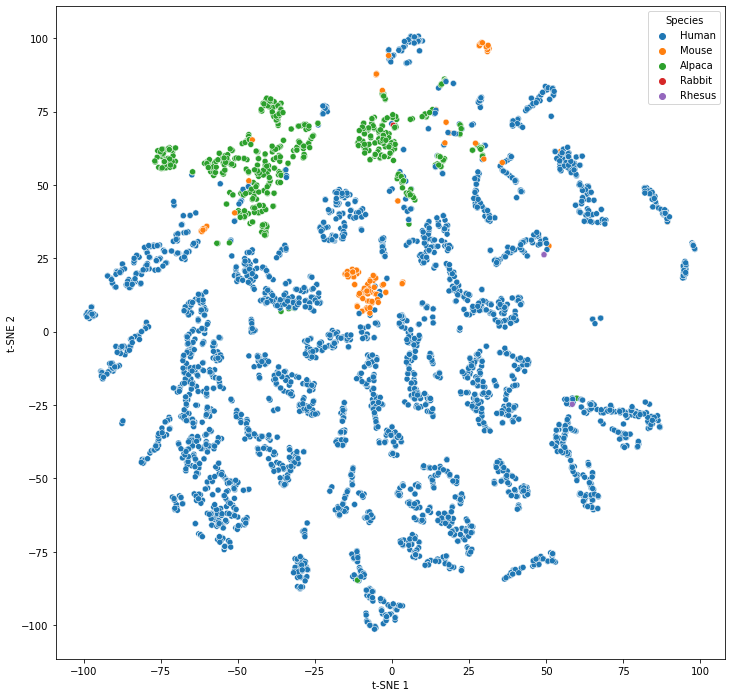

In [43]:
plt.figure(figsize=(12,12))
sns.scatterplot(
    x="t-SNE 1", y="t-SNE 2",
    hue="Species",
    data=df,
    legend="full"
)
plt.show()

In [45]:
v_genes = df["Heavy V Gene"].apply(lambda s: s.strip().split(' ')[0])
common_v_genes = v_genes.value_counts()[:30].index
common_v_genes

Index(['IGHV3-30', 'IGHV3-3', 'IGHV1-69', 'IGHV3-53', 'IGHV3-23', 'IGHV3-66',
       'IGHV5-51', 'IGHV1-46', 'IGHV4-39', 'IGHV3-30-3', 'IGHV1-2', 'IGHV3-9',
       'IGHV3-33', 'IGHV4-59', 'IGHV1-18', 'IGHV3S53', 'IGHV1-24', 'IGHV4-4',
       'IGHV3-21', 'IGHV3-13', 'IGHV4-31', 'IGHV3-7', 'IGHV4-34', 'IGHV1-58',
       'IGHV3-48', 'IGHV3-15', 'ND', 'IGHV3-11', 'IGHV1-8', 'IGHV2-5'],
      dtype='object')

In [46]:
genes_by_family = common_v_genes.groupby(common_v_genes.map(lambda g: g.split('-')[0].split('S')[0]))
genes_by_family

{'IGHV1': ['IGHV1-69', 'IGHV1-46', 'IGHV1-2', 'IGHV1-18', 'IGHV1-24', 'IGHV1-58', 'IGHV1-8'], 'IGHV2': ['IGHV2-5'], 'IGHV3': ['IGHV3-30', 'IGHV3-3', 'IGHV3-53', 'IGHV3-23', 'IGHV3-66', 'IGHV3-30-3', 'IGHV3-9', 'IGHV3-33', 'IGHV3S53', 'IGHV3-21', 'IGHV3-13', 'IGHV3-7', 'IGHV3-48', 'IGHV3-15', 'IGHV3-11'], 'IGHV4': ['IGHV4-39', 'IGHV4-59', 'IGHV4-4', 'IGHV4-31', 'IGHV4-34'], 'IGHV5': ['IGHV5-51'], 'ND': ['ND']}

In [47]:
scales = {
    'IGHV1': 'Blues',
    'IGHV2': 'Purples',
    'IGHV3': 'Reds',
    'IGHV4': 'Greens',
    'IGHV5': 'Oranges',
}
palette = {'Other': '#999999', 'ND': '#444444'}
for family, genes in genes_by_family.items():
    if family == 'ND':
        continue
    for i, gene in enumerate(genes):
        palette[gene] = plt.get_cmap(scales[family])(i / len(genes) * 0.7 + 0.4)

/Users/prihodad/miniconda3/envs/mamba/envs/sapiens/lib/python3.7/site-packages/seaborn/relational.py:657: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = np.asarray(x), np.asarray(y), np.asarray(s), np.asarray(c)


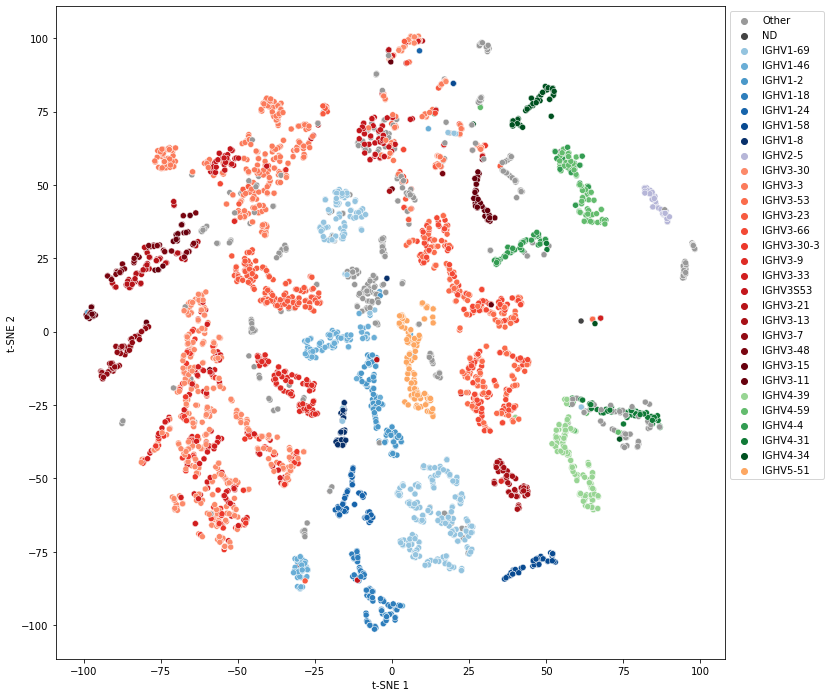

In [49]:
fig = plt.figure(figsize=(12,12))
ax = sns.scatterplot(
    x="t-SNE 1", y="t-SNE 2",
    hue=v_genes.apply(lambda g: g if g in common_v_genes else 'Other'),
    hue_order=palette.keys(),
    palette=palette,
    data=df,
    legend="full"
)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()